# Neural Networks and Computational Intelligence
**Assigment 1** \
Hugo Kolstee - s3515249 \
Yorick Juffer - s1993623

## Libraries

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os.path
from os import path

## Dataset
Generates a dataset where the vectors have a mean of 0 and a standard deviation of 1. Also generates the random labels of -1 and 1.

In [262]:
class Dataset:
    def __init__(self, p, n):
        self.p = p   # number of vectors
        self.n = n   # size of vectors
        self.left = int(self.p/2)
        self.right = self.p - self.left
        self.data = self.generate_data()
        self.labels = self.generate_labels()

    def generate_data(self):
        data_x = np.random.normal(0.01, 1, size=(self.left, self.n))
        data_y = np.random.normal(-0.01, 1, size=(self.right, self.n))
        data = np.concatenate((data_x, data_y))
        return data

    def generate_labels(self):
        labels_x = np.ones(self.left)
        labels_y = np.ones(self.right) * -1
        labels = np.concatenate((labels_x, labels_y))
        return labels

## Training

In [263]:
def train(data):
    weights = np.zeros(data.n)
    iterations = 100

    misclassifications_list = []

    for i in range(iterations):

        misclassifications = 0

        for j in range(0, data.p):
            
            if(np.dot(weights, data.data[j]) * data.labels[j] <= 0):
                weights += (1/data.n) * data.data[j] * data.labels[j]
                misclassifications += 1

        misclassifications_list.append(misclassifications)

        if(misclassifications == 0):
            break

    return misclassifications_list

## Perceptron

In [264]:
def perceptron(n):
    p_array = [int(i * n) for i in np.arange(0.75, 4.25, 0.01)]
    datasets = 50
    recording = False
    
    for dataset in range(datasets):

        accuracies = []

        for p in p_array:
            
            # generate
            data = Dataset(p, n)

            # train
            misclassifications_list = train(data)
            accuracy = (1 if misclassifications_list[-1] == 0 else 0)
            # accuracies.append(accuracy)

            if(not recording):
                results = np.array([[accuracy, p/n]])
                recording = True
            else:
                results = np.append(results, [[accuracy, p/n]], axis=0)

            print("N: {}, Dataset: {}, Alpha: {}".format(n, dataset, p/n), end="\r")

    return results

## Run Perceptrons
Checks if the .csv files are already present, if not runs the perceptrons. \
THIS TAKES A VERY LONG TIME TO RUN

In [310]:
if (not path.exists("data_5.csv")):
    data_5 = perceptron(5)
    np.savetxt("data_5.csv", data_5, delimiter=",")

if (not path.exists("data_20.csv")):
    data_20 = perceptron(20)
    np.savetxt("data_20.csv", data_5, delimiter=",")

if (not path.exists("data_100.csv")):
    data_100 = perceptron(100)
    np.savetxt("data_100.csv", data_5, delimiter=",")

if (not path.exists("data_200.csv")):
    data_200 = perceptron(200)
    np.savetxt("data_200.csv", data_5, delimiter=",")

## Load Data

In [302]:
df_5 = pd.read_csv('data_5.csv')
df_20 = pd.read_csv('data_20.csv')
df_100 = pd.read_csv('data_100.csv')
df_200 = pd.read_csv('data_200.csv')

## Data

In [307]:
df_5.columns = ["accuracy", "alpha"]
df_5_grouped = df_5.groupby(["alpha"]).mean()

df_20.columns = ["accuracy", "alpha"]
df_20_grouped = df_20.groupby(["alpha"]).mean()

df_100.columns = ["accuracy", "alpha"]
df_100_grouped = df_100.groupby(["alpha"]).mean()

df_200.columns = ["accuracy", "alpha"]
df_200_grouped = df_200.groupby(["alpha"]).mean()

## Generate Plots

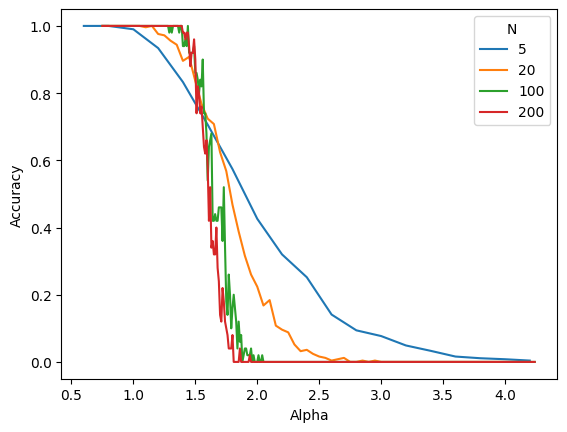

In [306]:
plt.plot(df_5_grouped, label = "5")
plt.plot(df_20_grouped,  label = "20")
plt.plot(df_100_grouped,  label = "100")
plt.plot(df_200_grouped,  label = "200")
plt.legend(loc="upper right", title="N")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()